In [1]:
import numpy as np
import pandas as pd
import random
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure7/output_fig7/'

from scripts.io_library import MyLib
from scripts.utils import Utils
from scripts.visualization import MyVisualization
from scripts.clustering_utils import Clustering

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

# Load datasets

In [3]:
gene_effect_file = 'Main_Data/CRISPR/CRISPR.csv'
all_gene_effect_df = MyLib.load_csv(gene_effect_file, index_col=0)
all_gene_effect_df = all_gene_effect_df.T
all_gene_effect_df = all_gene_effect_df.dropna(axis=1)
all_gene_effect_df = all_gene_effect_df.rename(columns={c:c.split(' (')[0] for c in all_gene_effect_df.columns})

upset_file = 'cell_lines_master_upset_2025-2-24.csv'
raw_upset_df = MyLib.load_csv(upset_file, index_col=0)
upset_df = raw_upset_df[raw_upset_df['Subtype'] != 'HCC']
upset_df = upset_df[["Subtype", 'DepMap_ID', 'RNA', 'CRISPR']]
print(f'upset shape: {upset_df.shape}')

crispr_upset_df = raw_upset_df[(raw_upset_df['CRISPR']==1) & (raw_upset_df['Subtype'] != 'HCC')]
gene_effect_df = all_gene_effect_df.loc[crispr_upset_df.index,:]
print(f'gene effect shape: {gene_effect_df.shape}')

rna_file = 'Main_Data/RNA/rna_cell_lines.csv'
all_rna_df = MyLib.load_csv(rna_file, index_col=0).T

rna_upset_df = raw_upset_df[(raw_upset_df['RNA']==1) & (raw_upset_df['Subtype'] != 'HCC')]
rna_df = all_rna_df.loc[rna_upset_df.index, :]
rna_fold_df = rna_df.apply(lambda x:x-x.median())
print(f'rna shape: {rna_df.shape}')


proteomics_file = 'Main_Data/Proteomics/proteomics_collapsed.csv'
all_proteomics_df = MyLib.load_csv(proteomics_file, index_col=0).T
# proteomics_df = proteomics_df.dropna(axis=1, how ='all')
all_proteomics_df = Clustering.filter_sparse_samples(all_proteomics_df, max_allowed_nans_zeros_frac=0.4)
proteins_upset_df = raw_upset_df[(raw_upset_df['Protein']==1) & (raw_upset_df['Subtype'] != 'HCC')]
proteomics_df = all_proteomics_df.loc[proteins_upset_df.index,:]
proteomics_mad_df = proteomics_df.apply(Clustering.mad_normalize)
print(f'proteomics_mad shape:{proteomics_mad_df.shape}')


all_proteomics_mad_df = all_proteomics_df.apply(Clustering.mad_normalize)
print(f'all_proteomics_mad shape:{all_proteomics_mad_df.shape}')

proteins_key_file = 'Additional_Data/Selected_Lists/protein_gene_mapping.csv'
proteomics_key_df = MyLib.load_csv(proteins_key_file, index_col=0)

input_data/Main_Data/CRISPR/CRISPR.csv  is loaded, shape:  (18443, 60)

input_data/cell_lines_master_upset_2025-2-24.csv  is loaded, shape:  (87, 11)

upset shape: (63, 4)
gene effect shape: (39, 17787)
input_data/Main_Data/RNA/rna_cell_lines.csv  is loaded, shape:  (17649, 79)

rna shape: (56, 17649)
input_data/Main_Data/Proteomics/proteomics_collapsed.csv  is loaded, shape:  (14411, 75)

proteomics_mad shape:(58, 8284)
all_proteomics_mad shape:(75, 8284)
input_data/Additional_Data/Selected_Lists/protein_gene_mapping.csv  is loaded, shape:  (11421, 1)



In [4]:
ccle_cripsr_file = 'Additional_Data/DepMap/CRISPRGeneEffect.csv'
raw_ccle_crispr_df = MyLib.load_csv(ccle_cripsr_file, index_col=0)
raw_ccle_crispr_df = raw_ccle_crispr_df.rename(columns={c:c.split(' (')[0] for c in raw_ccle_crispr_df.columns})
ccle_crispr_df = raw_ccle_crispr_df.dropna(axis=1)
print(f'ccle_crispr_df shape:{ccle_crispr_df.shape}')

other_ccle_crispr_df = ccle_crispr_df[~ccle_crispr_df.index.isin(upset_df['DepMap_ID'])]
print(f'other_ccle_crispr_df shape:{other_ccle_crispr_df.shape}')

ccle_rna_file = 'Additional_Data/DepMap/RNA_20Q2/CCLE_expression.csv'
ccle_rna_df = MyLib.load_csv(ccle_rna_file, index_col=0)
ccle_rna_df = ccle_rna_df.drop(['ACH-000052']) # Not part of the initial dataset
ccle_rna_df = ccle_rna_df.dropna(axis=1)
ccle_rna_df = ccle_rna_df.rename(columns={c:c.split(' (')[0] for c in ccle_rna_df.columns})
ccle_rna_fold_df = ccle_rna_df.apply(lambda x:x-x.median())
print(f'ccle_rna_df shape: {ccle_rna_df.shape}')

other_ccle_rna_df = ccle_rna_df[~ccle_rna_df.index.isin(upset_df['DepMap_ID'])]
other_ccle_rna_fold_df = ccle_rna_fold_df.loc[other_ccle_rna_df.index]
# other_ccle_rna_df, t = Utils.match_rows_df(ccle_rna_df, other_ccle_crispr_df)
print(f'other_ccle_rna_df shape: {other_ccle_rna_df.shape}')

input_data/Additional_Data/DepMap/CRISPRGeneEffect.csv  is loaded, shape:  (1100, 18443)

ccle_crispr_df shape:(1100, 17107)
other_ccle_crispr_df shape:(1061, 17107)
input_data/Additional_Data/DepMap/RNA_20Q2/CCLE_expression.csv  is loaded, shape:  (1305, 19144)

ccle_rna_df shape: (1304, 19144)
other_ccle_rna_df shape: (1264, 19144)


# CSGALNACT1 Proteomics

In [5]:
RNA_upset_file = 'Figure5/output_fig5/RNA_Gene_reordered_upset_df.csv'
RNA_upset_df = pd.read_csv(RNA_upset_file, index_col=0)
protein_gene_mapping_file = 'Additional_Data/Selected_Lists/protein_gene_mapping.csv'
protein_gene_mapping_df = MyLib.load_csv(protein_gene_mapping_file, index_col=0)

input_data/Additional_Data/Selected_Lists/protein_gene_mapping.csv  is loaded, shape:  (11421, 1)



## R3 vs Rest

In [6]:
temp_upset_df = RNA_upset_df[RNA_upset_df['Subtype']!='HCC'][['RNA_Cluster']]
prot_rna_upset_df , proteomics_mad_filtered_df = Utils.match_rows_df(temp_upset_df, proteomics_mad_df)
r3_ids_l = prot_rna_upset_df[prot_rna_upset_df['RNA_Cluster']=='R3'].index.tolist()
prot_rna_upset_df[prot_rna_upset_df['RNA_Cluster']!='R3'] = 'Rest'
prot_rna_upset_df

,RNA_Cluster
AOVC1,Rest
CCLP1,Rest
CCSW1,Rest
ECC3,Rest
ECC4,Rest
EGI1,Rest
G415,Rest
GB2,Rest
GB3,R3
HKGZCC,Rest


In [7]:
proteomics_mad_filtered_df.loc[~proteomics_mad_filtered_df.index.isin(r3_ids_l)].shape

(34, 8284)


File  Figure7/output_fig7/proteins_features_r3_rest.csv saved, shape: (8284, 7)


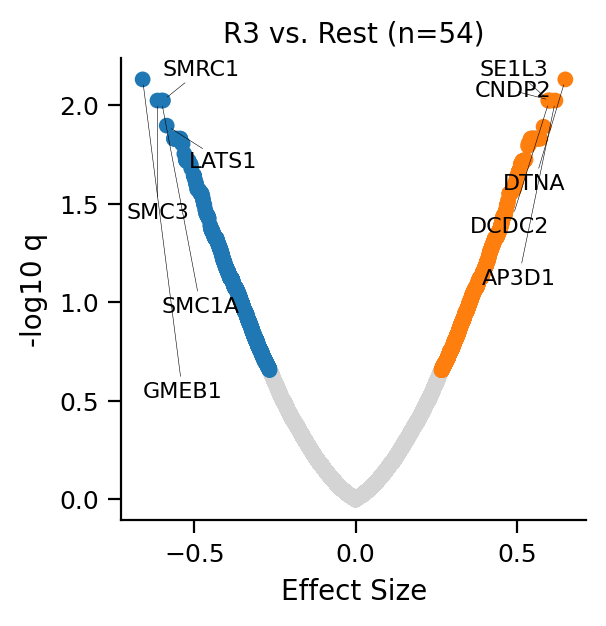

In [8]:
down_df, up_df = Utils.statistical_test_and_volcano_plot(proteomics_mad_filtered_df.loc[r3_ids_l], proteomics_mad_filtered_df.loc[~proteomics_mad_filtered_df.index.isin(r3_ids_l)], test='ranksum', xlabel='Effect Size', q_value=0.25, cut_off_labels=5, force_points=13, force_text=8,  save_file=f'proteins_features_r3_rest.csv', plot_qqplot=False, title=f'R3 vs. Rest (n={len(proteomics_mad_filtered_df)})', return_sig=True)#, selected_genes_dic=selected_genes_dic, cut_off_labels=3,   ylim_top=60, xlim_right=0.5,

In [9]:
down_df['GeneName'] = protein_gene_mapping_df.loc[down_df['feature']]['GeneName'].values
MyLib.save_csv(down_df, 'proteins_features_r3_rest_down.csv', index=False)
up_df['GeneName'] = protein_gene_mapping_df.loc[up_df['feature']]['GeneName'].values
MyLib.save_csv(up_df, 'proteins_features_r3_rest_up.csv', index=False)


File  Figure7/output_fig7/proteins_features_r3_rest_down.csv saved, shape: (884, 8)

File  Figure7/output_fig7/proteins_features_r3_rest_up.csv saved, shape: (990, 8)


In [10]:
up_df[up_df['GeneName']=='CSGALNACT1']

,feature,stat,p-value,effect_size,q-value,in_group_mean,out_group_mean,GeneName
8205,CGAT1,3.517608,0.000435,0.478686,0.028006,0.874406,-1.100586,CSGALNACT1


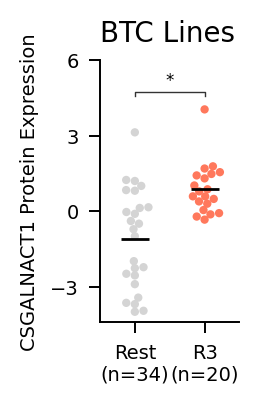

In [11]:
x = 'RNA_Cluster'
gene_lbl = 'CSGALNACT1'
gene = 'CGAT1'
q_val = 0.028 # from the above analysis
color_dic = {'Rest': '#d4d4d4', 'R3': MyVisualization.feat_colors_dic['Cluster']['R3']}
proteomics_mad_filtered_df, temp_upset_df = Utils.match_rows_df(proteomics_mad_df, prot_rna_upset_df)
df = pd.concat([proteomics_mad_filtered_df, temp_upset_df['RNA_Cluster']], axis=1)
Utils.compare_visualize_cat_features(df, x=x, y=gene, color_dic=color_dic, y_label=f'{gene_lbl} Protein Expression', x_label='', test=None, p_value=q_val,  title='BTC Lines', label_fontsize=7,  label_newline=True, ylim_top=6,  ytick_step=3, title_height=1., figure_width=.9, figure_height=1.7, save_figure=True)#, , title_height=1.1, figure_width=1., figure_height=2

# UXS1

In [12]:
RNA_upset_file = 'Figure5/output_fig5/RNA_Gene_reordered_upset_df.csv'
RNA_upset_df = pd.read_csv(RNA_upset_file, index_col=0)
RNA_upset_df = RNA_upset_df[RNA_upset_df.index.isin(gene_effect_df.index)]
print(len(RNA_upset_df))

feats_file = 'Figure5/output_fig5/rna_clusters_DDA_features.csv'
feats_df = pd.read_csv(feats_file, index_col=0)
feats_df.head()

37


""
Gene
AAAS
ABCD4
ABI1
ACER3
ACSL3


In [13]:
gene_effect_filtered_df2 = gene_effect_df[feats_df.index]
R3_RNA_upset_df = RNA_upset_df[RNA_upset_df['RNA_Cluster']=='R3']
R4_RNA_upset_df = RNA_upset_df[RNA_upset_df['RNA_Cluster']=='R4']
r3_crispr_df = gene_effect_filtered_df2.loc[R3_RNA_upset_df.index]
r4_crispr_df = gene_effect_filtered_df2.loc[R4_RNA_upset_df.index]
print(r3_crispr_df.shape)
print(r4_crispr_df.shape)

(7, 771)
(21, 771)


## R3 vs R4

In [14]:
data_df = pd.concat([r3_crispr_df, r4_crispr_df], axis=0)
cur_upset_df = pd.DataFrame(['R3']*r3_crispr_df.shape[0]+['R4']*r4_crispr_df.shape[0], index=r3_crispr_df.index.tolist()+r4_crispr_df.index.tolist(), columns=['Group'])

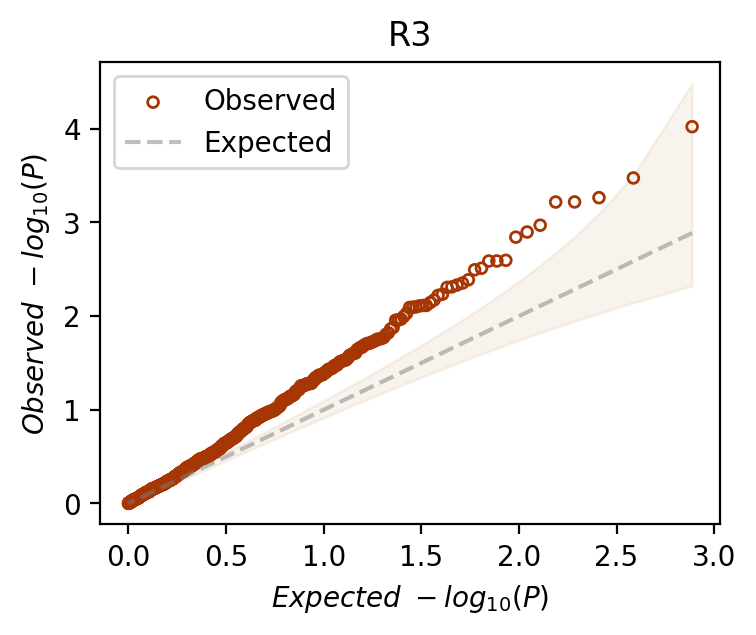


File  Figure7/output_fig7/R4_all_R3_features_Down.csv saved, shape: (22, 4)


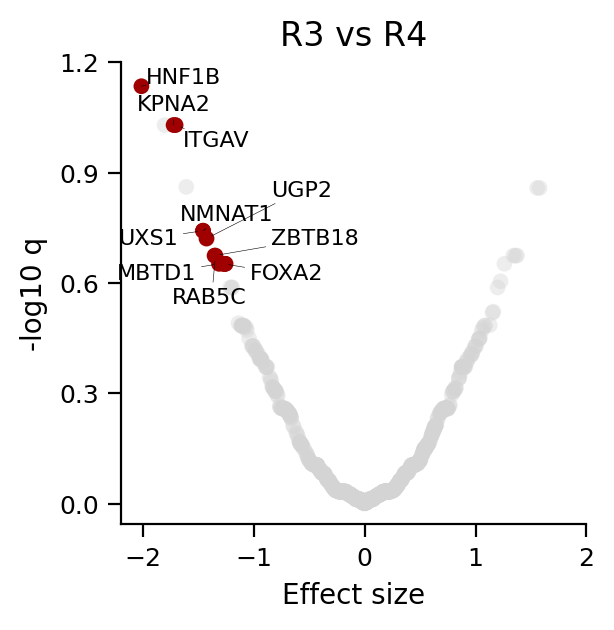


File  Figure7/output_fig7/R4_R3_features_Down_dep_hits.csv saved, shape: (13, 3)

File  Figure7/output_fig7/R4_R3_features_Down.csv saved, shape: (22, 3)


In [15]:
volcano_axes_lim_dic = {'R3': (1.2, None, 2, None, .3, 1)}
features = Clustering.identify_significant_features(data_df, cur_upset_df, up_regulated=False, ttest=True, cluster_column='Group', exclusion_ids=['R4'], q_val_thr=0.25, force_points=2.6, force_text=.1, title=' vs R4',  gene_effect_thr=-0.5,  cut_off_labels_top=10, volcano_axes_lim_dic=volcano_axes_lim_dic, filter=True, filename_prefix='R4_')

In [16]:
color_dic = {'R3': {'R3': MyVisualization.feat_colors_dic['Cluster']['R3']}, 'R4':{'R4': MyVisualization.feat_colors_dic['Cluster']['R4']}}
color_rug_dic = color_dic
gene = 'UXS1'
q_val = 0.18 # based on the volcano plot above
cur_crispr_df = pd.concat([r3_crispr_df, r4_crispr_df], axis=0)
df, _ = Utils.prepare_data_for_hue_plots(cur_crispr_df[[gene]], raw_upset_df.loc[R3_RNA_upset_df.index], label1='R3', label2='R4', id_vars='index', reverse_groups=True)
df = df.rename(columns={'value': 'Gene Effect'})
df

,index,Gene,Gene Effect,Group
0,ICC9,UXS1,-0.069244,R4
1,HUCCT1,UXS1,-0.143591,R4
2,ICC8,UXS1,-0.638902,R4
3,ICC12,UXS1,-0.190099,R4
4,EGI1,UXS1,-0.071187,R4
5,AOVC1,UXS1,0.053784,R4
6,TGBC1TKB,UXS1,-1.472007,R4
7,YSCCC,UXS1,-0.801805,R4
8,ICC2,UXS1,-0.328803,R4
9,ECC3,UXS1,-0.080833,R4


Figure7/output_fig7/UXS1_R4_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

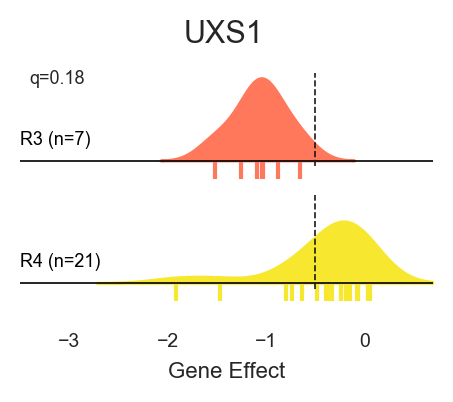

In [17]:
MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect', xlim_right=0.7, xlim_left=-3.5, aspect=3, title='UXS1', p_value_l=[q_val], fdr=True, sig_thr=0.25, vline_offset=0.16, xtick_step=1, rug_plot_height=0.3, add_legend=False, file_name=gene + '_R4')

## R3 vs Other DepMap

In [18]:
other_ccle_crispr_filtered_df, r3_crispr_df2 = Utils.match_columns_df(other_ccle_crispr_df, r3_crispr_df)
other_ccle_crispr_filtered_df.shape

(1061, 770)

In [19]:
crispr_data_df = pd.concat([other_ccle_crispr_filtered_df, r3_crispr_df2], axis=0)
print(crispr_data_df.shape)
cur_upset_df = pd.DataFrame(['Other DepMap']*other_ccle_crispr_filtered_df.shape[0]+['R3']*r3_crispr_df.shape[0], index=other_ccle_crispr_filtered_df.index.tolist()+r3_crispr_df.index.tolist(), columns=['Group'])
len(cur_upset_df)

(1068, 770)


1068

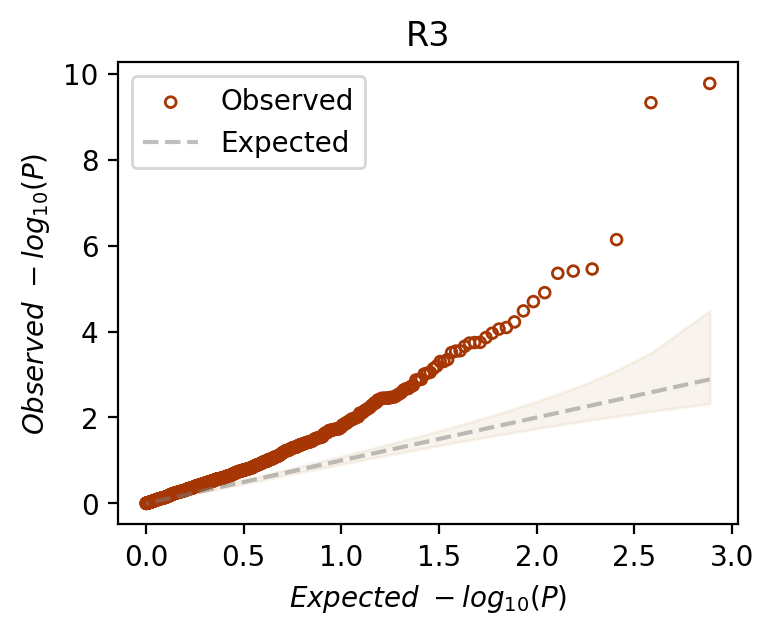


File  Figure7/output_fig7/other_depmap_all_R3_features_Down.csv saved, shape: (59, 6)


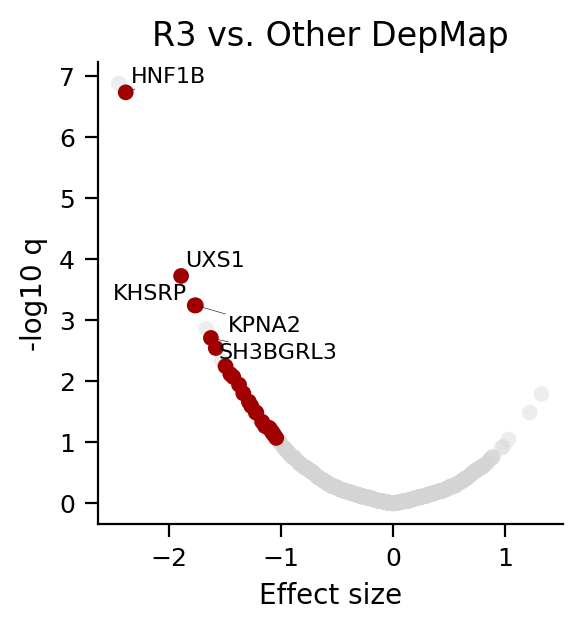


File  Figure7/output_fig7/other_depmap_R3_features_Down_dep_hits.csv saved, shape: (25, 5)

File  Figure7/output_fig7/other_depmap_R3_features_Down.csv saved, shape: (59, 5)


In [20]:
# volcano_axes_lim_dic = {'R3': (6, None, 2, None, 1.5, None)}
features = Clustering.identify_significant_features(crispr_data_df, cur_upset_df, up_regulated=False, ttest=True, cluster_column='Group', title=f' vs. Other DepMap', exclusion_ids=['Other DepMap'], q_val_thr=0.1, force_points=2.6, force_text=.1,  save_figure=True, gene_effect_thr=-0.5, cut_off_labels_top=5, filter=True, add_mean_cols=True, filename_prefix='other_depmap_')# volcano_axes_lim_dic=volcano_axes_lim_dic,

In [21]:
color_dic = {'R3': {'R3': MyVisualization.feat_colors_dic['Cluster']['R3']}, 'Other CCLE': {'Other CCLE': '#d4d4d4'}}
color_rug_dic = color_dic
gene = 'UXS1'
q_val = 0.0002 # based on the volcano plot above
cur_crispr_df = pd.concat([r3_crispr_df, other_ccle_crispr_df], axis=0)
df, _ = Utils.prepare_data_for_hue_plots(cur_crispr_df[[gene]], raw_upset_df.loc[R3_RNA_upset_df.index], label1='R3', label2='Other CCLE', id_vars='index', reverse_groups=True)
df = df.rename(columns={'value': 'Gene Effect'})
df

,index,variable,Gene Effect,Group
0,ACH-000970,UXS1,-0.264310,Other CCLE
1,ACH-000422,UXS1,-0.335100,Other CCLE
2,ACH-000077,UXS1,-0.629865,Other CCLE
3,ACH-001385,UXS1,-0.192293,Other CCLE
4,ACH-000645,UXS1,-0.124674,Other CCLE
...,...,...,...,...
2,RBE,UXS1,-0.657175,R3
3,ICC4,UXS1,-1.094441,R3
4,ICC10-6,UXS1,-1.044790,R3
5,ICC10,UXS1,-1.519992,R3


Figure7/output_fig7/UXS1_other_depmap_ridge_plot.pdf


<Figure size 300x200 with 0 Axes>

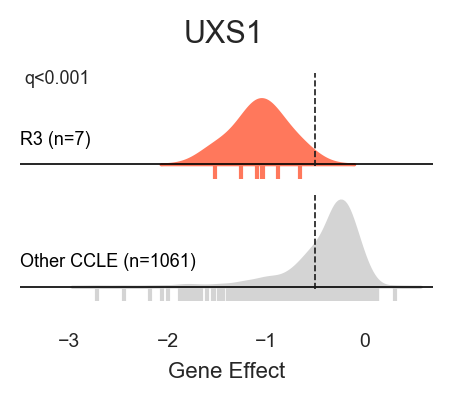

In [22]:
MyVisualization.ridge_plot(df, color_dic, color_rug_dic, col_hue='Group', col_level='Group', col_score='Gene Effect', xlim_right=0.7, xlim_left=-3.5, aspect=3, title='UXS1', p_value_l=[q_val], fdr=True, sig_thr=0.25, vline_offset=0.16, xtick_step=1, rug_plot_height=0.3, add_legend=False, file_name=gene + '_other_depmap')

# Scatter plots

In [23]:
points_color = '#6b676e'
line_color = '#C1914B'

## CTNNB1 vs AXIN2

p-value:  5.645909141949266e-98
p-value:  1.8503431475411756e-08


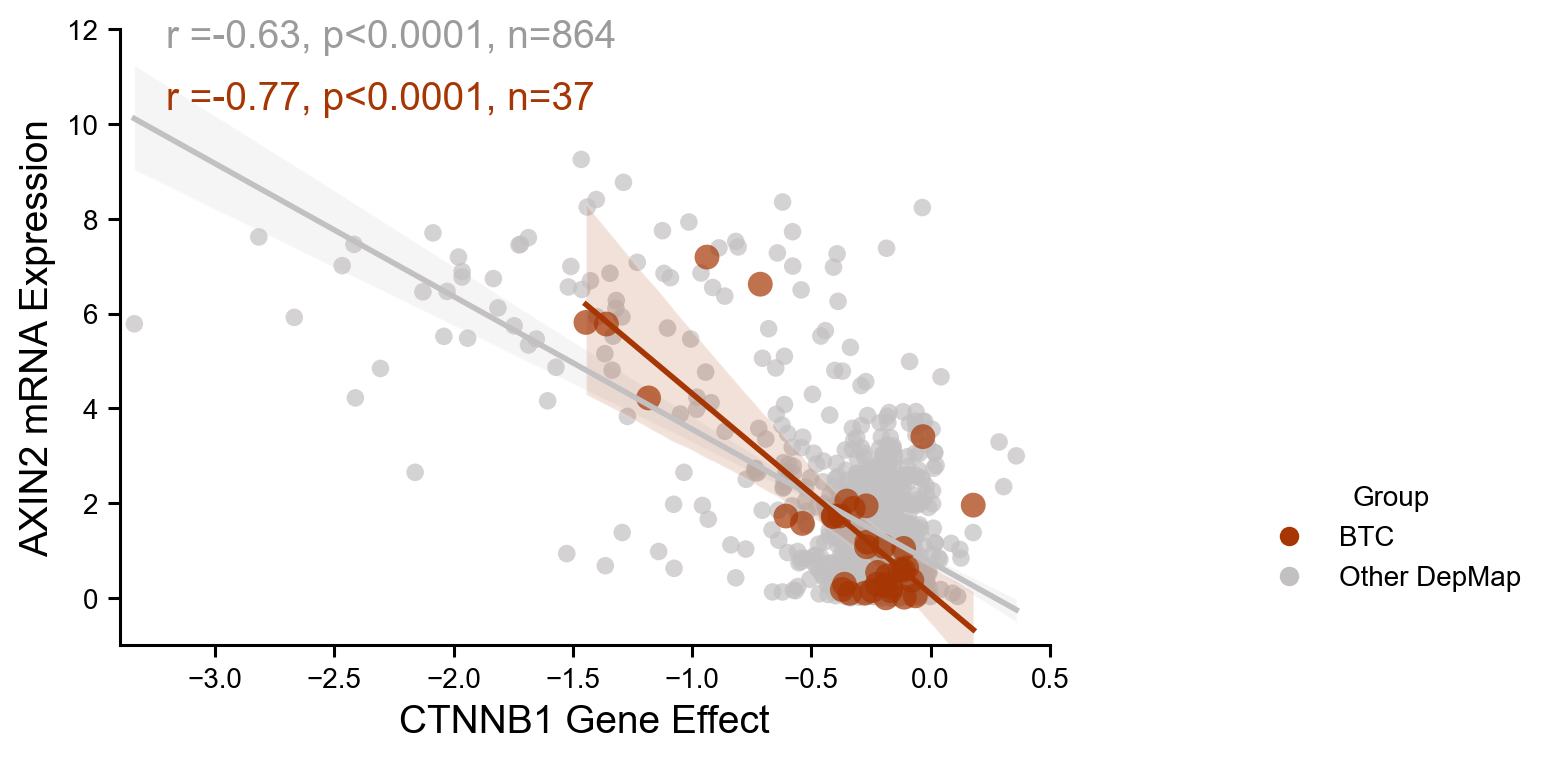

In [24]:
x_gene = 'CTNNB1'
y_gene = 'AXIN2'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.97, ylim_bottom=-1, ylim_top=12, xlim_left=-3.4, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')# 

## CTNNB1 Multiple Testing Corrections

In [25]:
gene = 'CTNNB1'
selected_genes_dic = {'AXIN2':'#A63603'}
genes_file= 'Additional_Data/Selected_Lists/MHT/CTNNB1.xlsx'
hypotheses_l = MyLib.load_xls(genes_file, sheet_no=0)['GeneName'].values.tolist()
hypotheses_l = [h for h in hypotheses_l if h in rna_df.columns]
print('Number of hypotheses: ', len(hypotheses_l))


Number of hypotheses:  122



File  Figure7/output_fig7/other_depmap_CTNNB1_gene_effect_corr_rna.csv saved, shape: (122, 4)


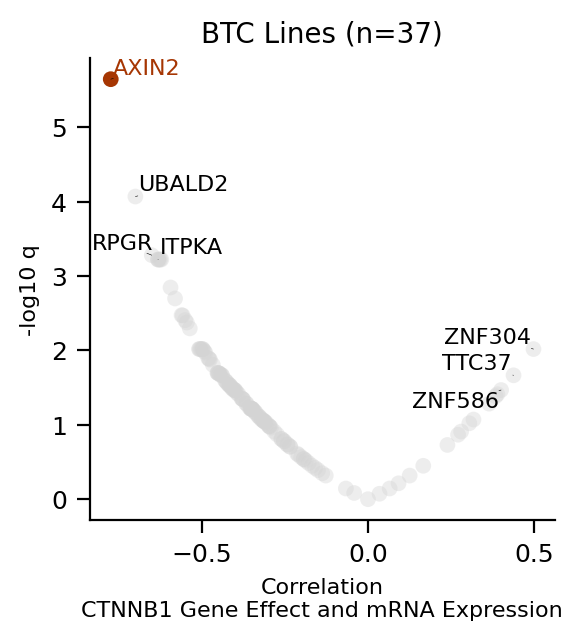

feature       AXIN2
corr      -0.774564
p-value         0.0
q-value    0.000002
color       #A63603
Name: AXIN2, dtype: object

In [26]:
x, y = Utils.match_rows_df(gene_effect_df[[gene]], rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'BTC Lines (n={y.shape[0]})', axis_label_fontsize=8)
corr_res_df.loc['AXIN2',:]


File  Figure7/output_fig7/other_depmap_CTNNB1_gene_effect_corr_rna.csv saved, shape: (122, 4)


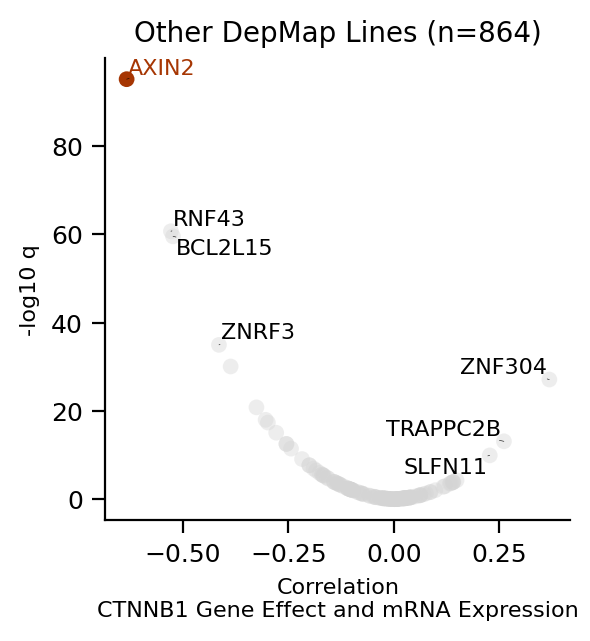

CTNNB1 corr: -0.6331218990497289 q-value: 6.888009153178104e-96


In [27]:
x, y = Utils.match_rows_df(other_ccle_crispr_df[[gene]], other_ccle_rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'Other DepMap Lines (n={y.shape[0]})', axis_label_fontsize=8)
print(gene, 'corr:', corr_res_df.loc['AXIN2','corr'],'q-value:', corr_res_df.loc['AXIN2','q-value'])

## ITGB5 vs PTK2B 

p-value:  3.514515021115585e-17
p-value:  0.0022625500035047736


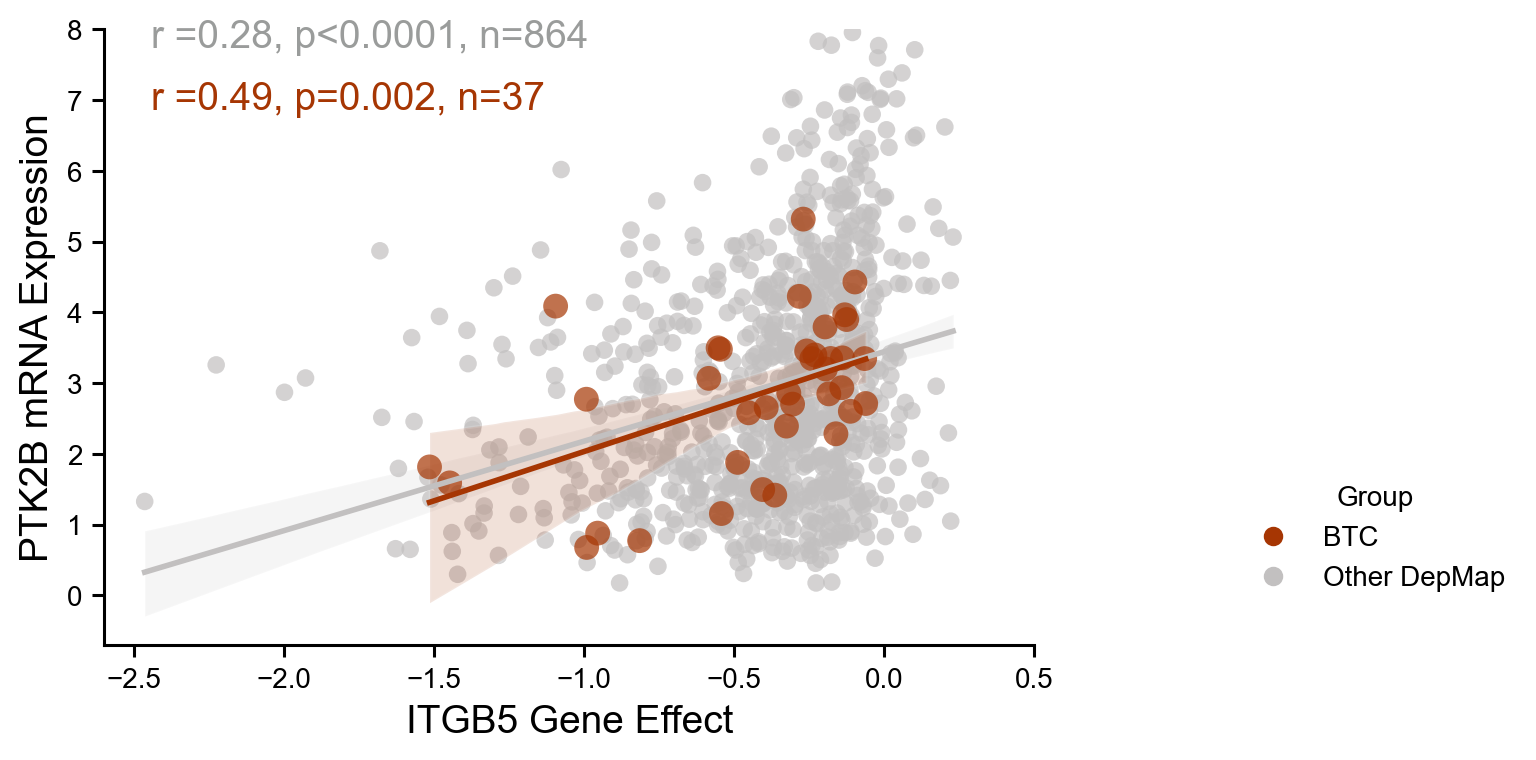

In [28]:
x_gene = 'ITGB5'
y_gene = 'PTK2B'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.97, ylim_top=8, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')#  ylim_bottom=-.1,

## ITGB5 Multiple Testing Corrections

In [29]:
gene = 'ITGB5'
selected_genes_dic = {'PTK2B':'#A63603'}
genes_file= 'Additional_Data/Selected_Lists/MHT/ITGB5.xlsx'
hypotheses_l = MyLib.load_xls(genes_file, sheet_no=0)['GeneName'].values.tolist()
print('Number of hypotheses: ', len(hypotheses_l))


Number of hypotheses:  65



File  Figure7/output_fig7/other_depmap_ITGB5_gene_effect_corr_rna.csv saved, shape: (65, 4)


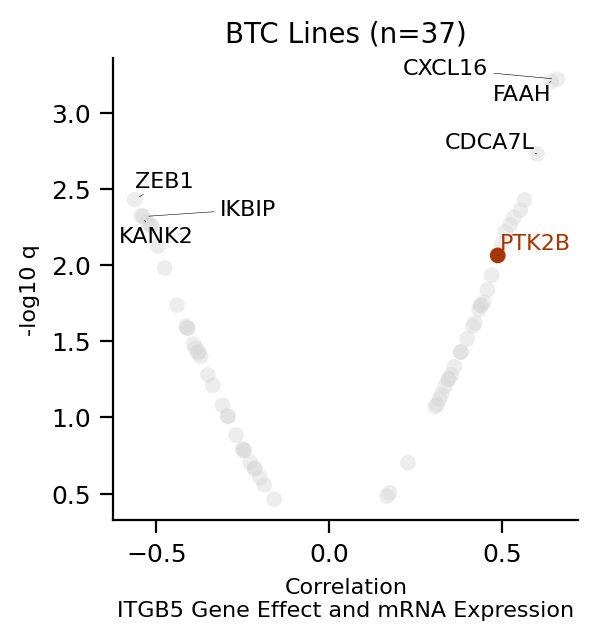

feature       PTK2B
corr       0.486535
p-value    0.002263
q-value    0.008651
color       #A63603
Name: PTK2B, dtype: object

In [30]:
x, y = Utils.match_rows_df(gene_effect_df[[gene]], rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'BTC Lines (n={y.shape[0]})', axis_label_fontsize=8)
corr_res_df.loc['PTK2B',:]


File  Figure7/output_fig7/other_depmap_ITGB5_gene_effect_corr_rna.csv saved, shape: (65, 4)


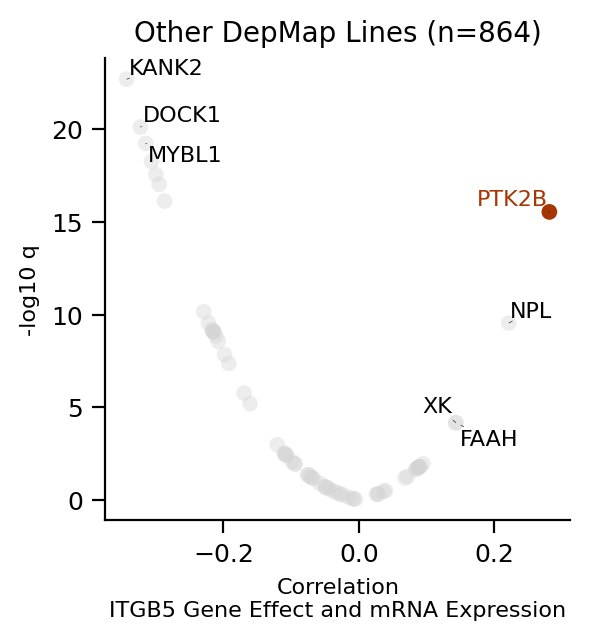

ITGB5 corr: 0.28132504001920067 q-value: 2.855543454656413e-16


In [31]:
x, y = Utils.match_rows_df(other_ccle_crispr_df[[gene]], other_ccle_rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'Other DepMap Lines (n={y.shape[0]})', axis_label_fontsize=8)
print(gene, 'corr:', corr_res_df.loc['PTK2B','corr'],'q-value:', corr_res_df.loc['PTK2B','q-value'])

## UXS1 vs UGDH

p-value:  5.532212452141479e-30
p-value:  0.0001411555892831379


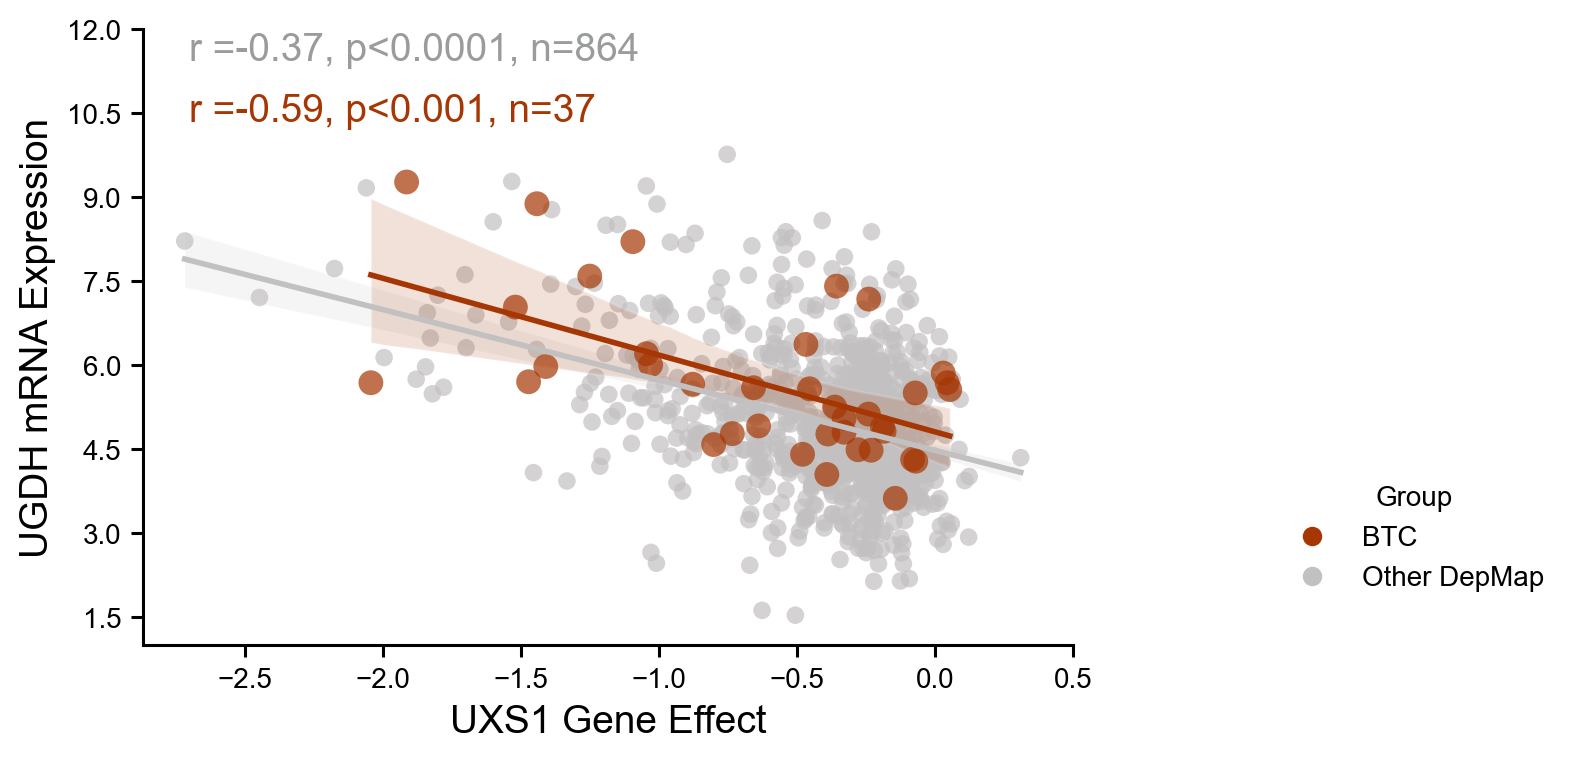

In [32]:
x_gene = 'UXS1' 
y_gene = 'UGDH'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.95, ylim_top=12, ylim_bottom=1., xlim_right=0.5, ytick_step=1.5, file_name=f'{x_gene}_{y_gene}')#

## UXS1 vs SLC35D1

p-value:  0.10297704266410826
p-value:  0.005643169238286912


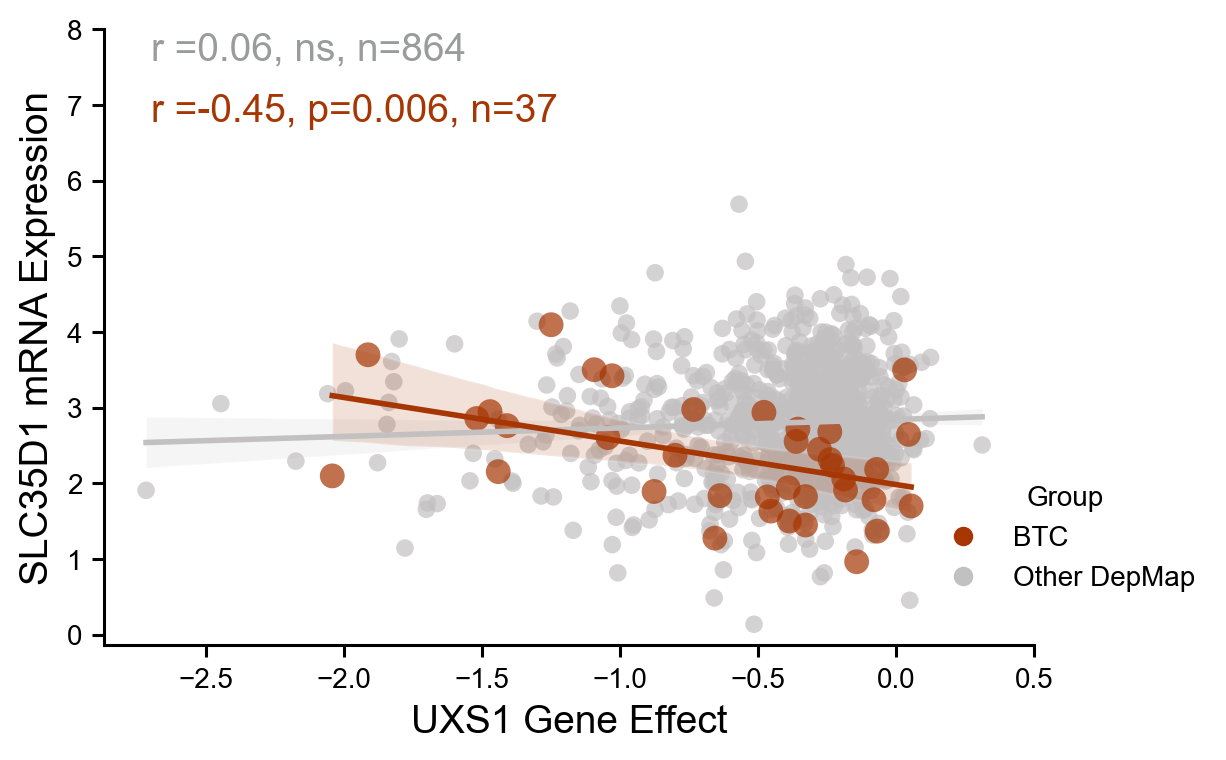

In [33]:
x_gene = 'UXS1' 
y_gene = 'SLC35D1'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.95, ylim_top=8, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')#

## UXS1 vs CSGALNACT1 

p-value:  0.0006395998673267576
p-value:  0.005656313624668418


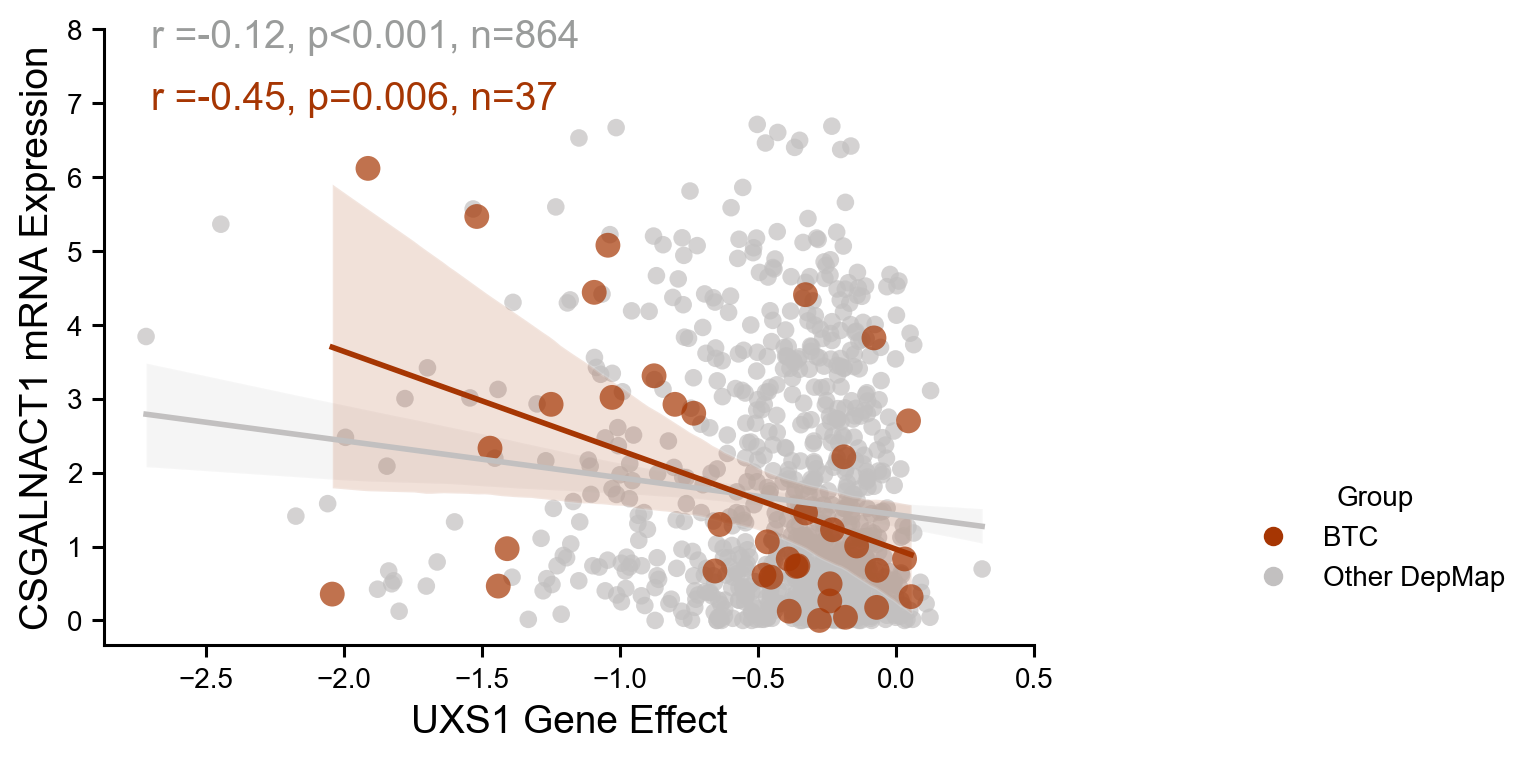

In [34]:
x_gene = 'UXS1' 
y_gene = 'CSGALNACT1'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.97, ylim_top=8, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')#

## UXS1 Multiple Testing Corrections

In [35]:
gene = 'UXS1'
selected_genes_dic = {'CSGALNACT1':'#A63603', 'SLC35D1':'#A63603'}
genes_file= 'Additional_Data/Selected_Lists/MHT/UXS1.xlsx'
hypotheses_l = MyLib.load_xls(genes_file, sheet_no=0)['GeneName'].values.tolist()
print('Number of hypotheses: ', len(hypotheses_l))


Number of hypotheses:  31



File  Figure7/output_fig7/other_depmap_UXS1_gene_effect_corr_rna.csv saved, shape: (31, 4)


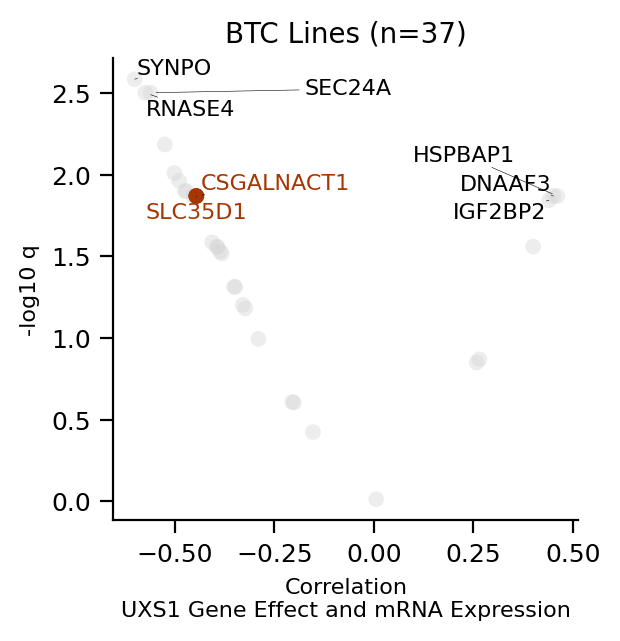

,feature,corr,p-value,q-value,color
Gene,,,,,
CSGALNACT1,CSGALNACT1,-0.446054,0.005656,0.013488,#A63603
SLC35D1,SLC35D1,-0.446163,0.005643,0.013488,#A63603


In [36]:
x, y = Utils.match_rows_df(gene_effect_df[[gene]], rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'BTC Lines (n={y.shape[0]})', axis_label_fontsize=8)
corr_res_df.loc[['CSGALNACT1', 'SLC35D1'],:]


File  Figure7/output_fig7/other_depmap_UXS1_gene_effect_corr_rna.csv saved, shape: (31, 4)


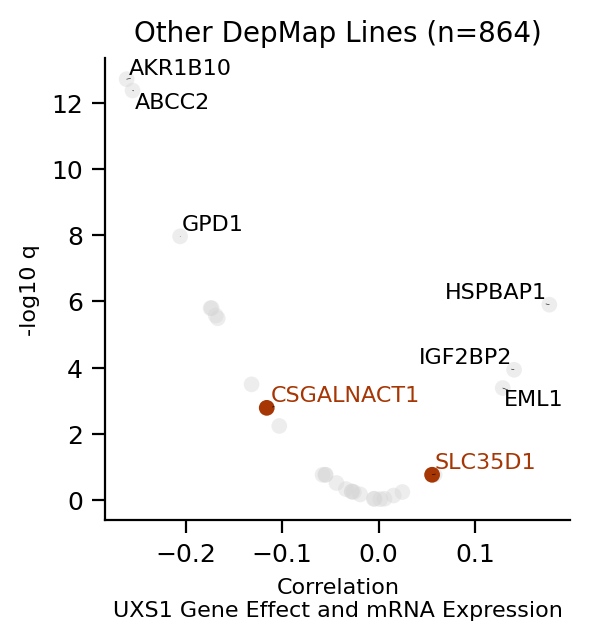

UXS1 corr: CSGALNACT1   -0.115931
SLC35D1       0.055511
Name: corr, dtype: float64 q-value: CSGALNACT1    0.001652
SLC35D1       0.175077
Name: q-value, dtype: float64


In [37]:
x, y = Utils.match_rows_df(other_ccle_crispr_df[[gene]], other_ccle_rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'Other DepMap Lines (n={y.shape[0]})', axis_label_fontsize=8)
print(gene, 'corr:', corr_res_df.loc[['CSGALNACT1', 'SLC35D1'],'corr'],'q-value:', corr_res_df.loc[['CSGALNACT1', 'SLC35D1'],'q-value'])

## ABI1 vs ABI2

p-value:  2.9482947479532835e-13
p-value:  0.0007179715512617351


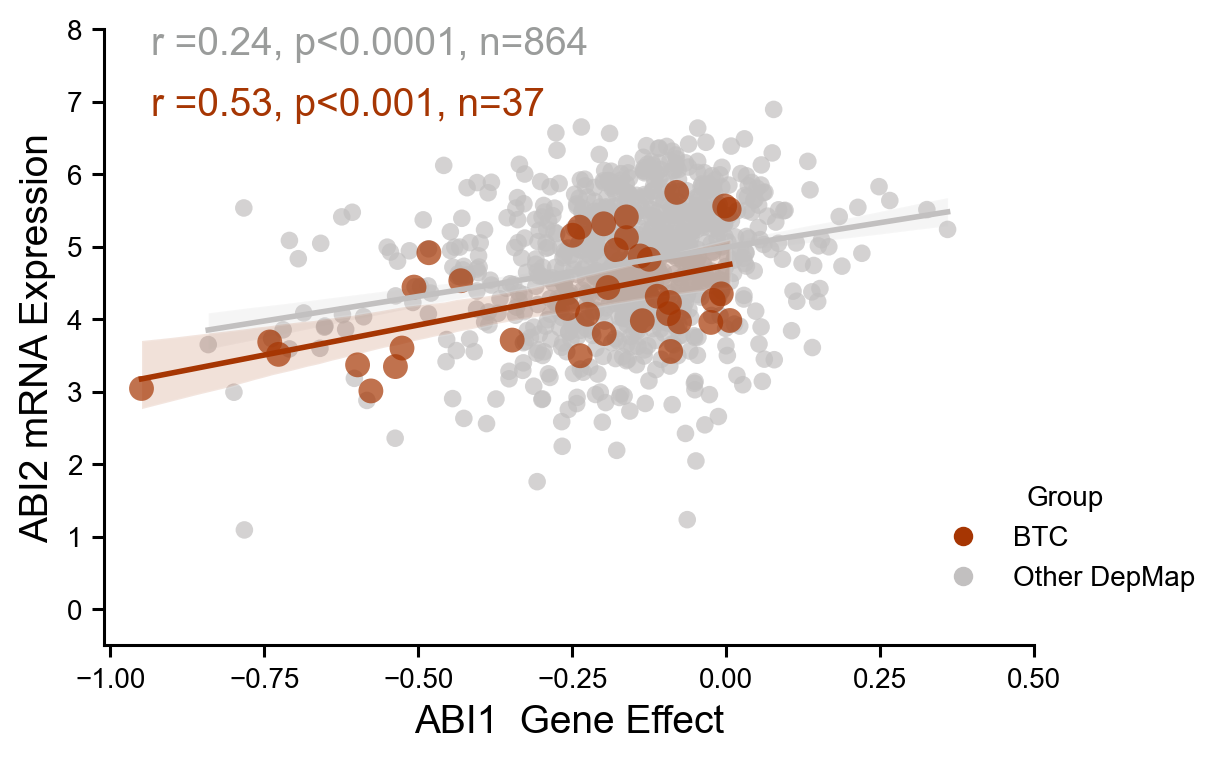

In [38]:
y_gene = 'ABI2' 
x_gene = 'ABI1'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2 = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene}  Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.96, ylim_top=8, ylim_bottom=-.5, xlim_right=.5, xlim_left=-1.01, xtick_step=.25, file_name=f'{x_gene}_{y_gene}')#

## ABI2 vs WASF2

p-value:  0.0011466174802140534
p-value:  0.014537142352263015


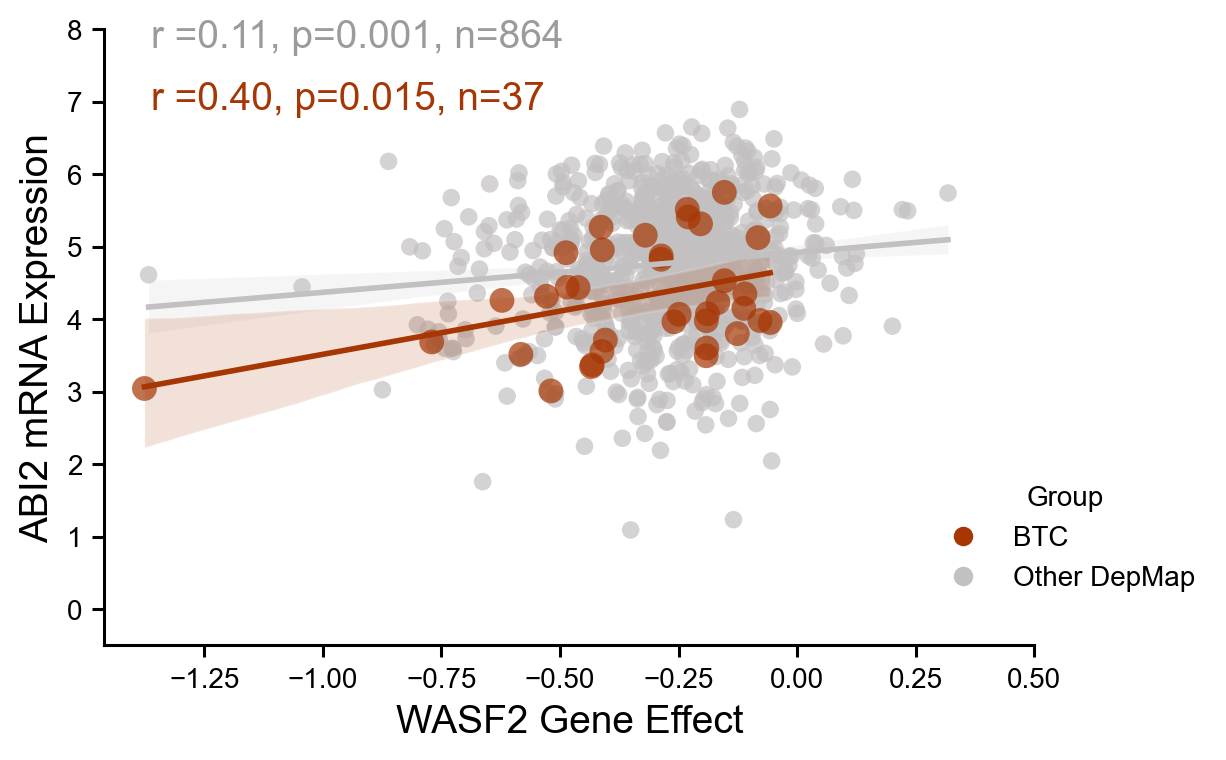

In [39]:
x_gene = 'WASF2'
y_gene = 'ABI2'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.97, ylim_top=8,ylim_bottom=-.5, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')#

## PARD6B vs MACC1 

p-value:  0.0005206589716932469
p-value:  0.006234537763624054


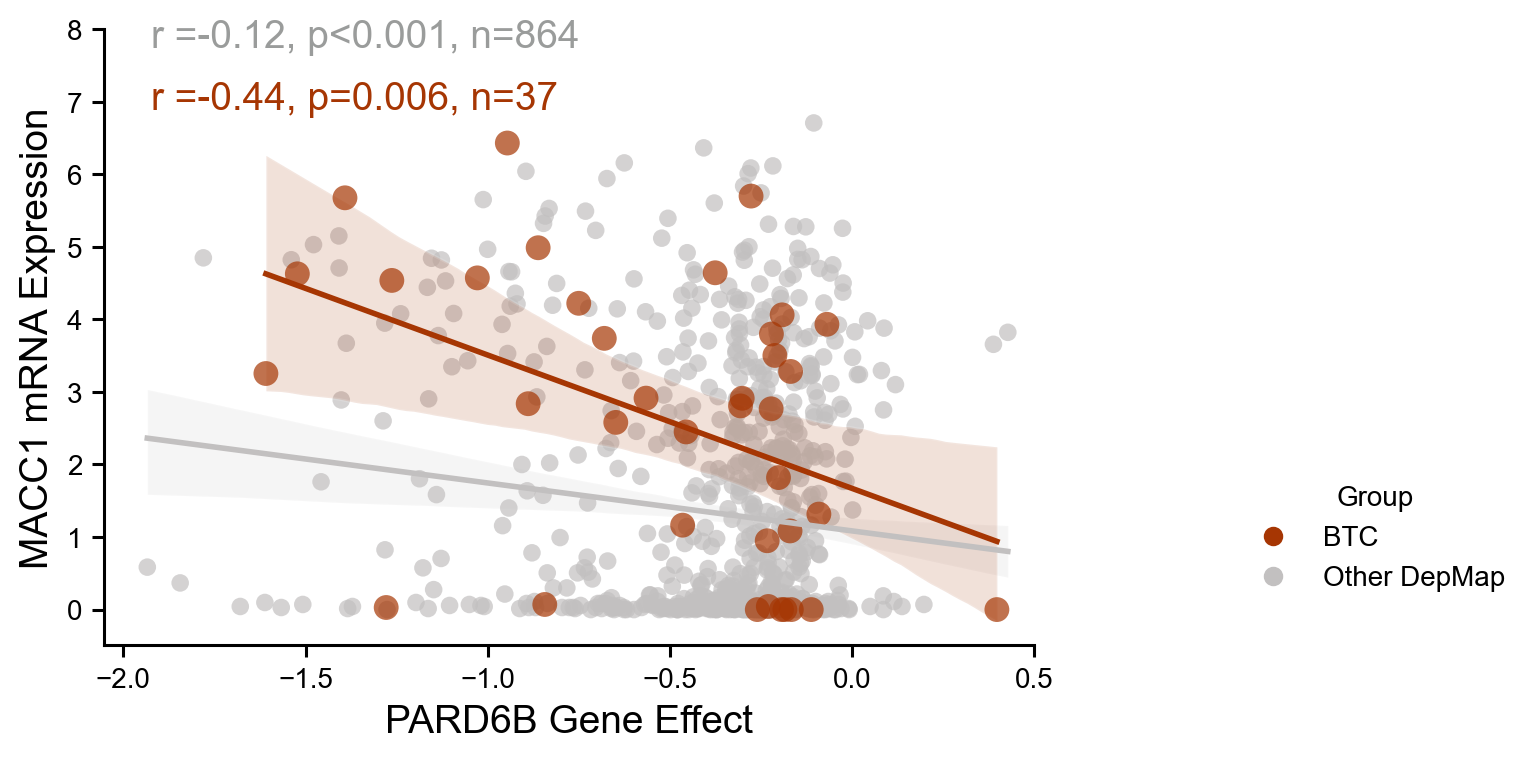

In [40]:
x_gene = 'PARD6B' 
y_gene = 'MACC1'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=.97, ylim_top=8, xlim_right=0.5, file_name=f'{x_gene}_{y_gene}')#  ylim_bottom=-.1,

## PARD6B Multiple Testing Corrections

In [41]:
gene = 'PARD6B'
selected_genes_dic = {'MACC1':'#A63603'}
genes_file= 'Additional_Data/Selected_Lists/MHT/PARD6B.xlsx'
hypotheses_l = MyLib.load_xls(genes_file, sheet_no=0)['GeneName'].values.tolist()
print('Number of hypotheses: ', len(hypotheses_l))


Number of hypotheses:  18



File  Figure7/output_fig7/other_depmap_PARD6B_gene_effect_corr_rna.csv saved, shape: (18, 4)


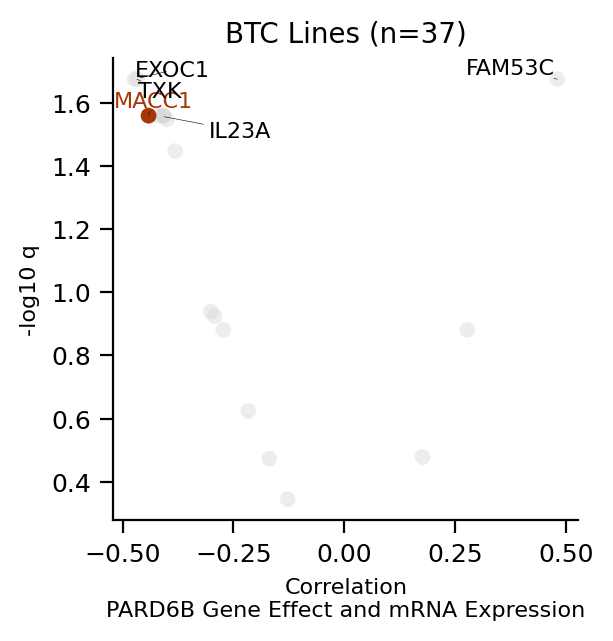

feature       MACC1
corr      -0.441456
p-value    0.006235
q-value    0.027585
color       #A63603
Name: MACC1, dtype: object

In [42]:
x, y = Utils.match_rows_df(gene_effect_df[[gene]], rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'BTC Lines (n={y.shape[0]})', axis_label_fontsize=8)
corr_res_df.loc['MACC1',:]


File  Figure7/output_fig7/other_depmap_PARD6B_gene_effect_corr_rna.csv saved, shape: (18, 4)


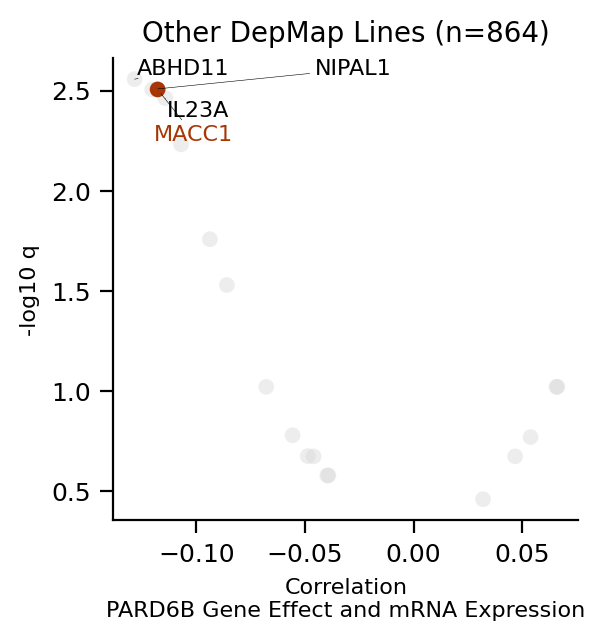

PARD6B corr: -0.11780753179241307 q-value: 0.0031239538301594816


In [43]:
x, y = Utils.match_rows_df(other_ccle_crispr_df[[gene]], other_ccle_rna_df[hypotheses_l])
corr_res_df = Utils.statistical_test_and_volcano_plot(x[[gene]], y, col=gene, test='correlation', xlabel=f'Correlation\n{gene} Gene Effect and mRNA Expression', force_points=.6, force_text=1., selected_genes_dic=selected_genes_dic, cut_off_labels=3, save_file=f'other_depmap_{gene}_gene_effect_corr_rna.csv',  title=f'Other DepMap Lines (n={y.shape[0]})', axis_label_fontsize=8)
print(gene, 'corr:', corr_res_df.loc['MACC1','corr'],'q-value:', corr_res_df.loc['MACC1','q-value'])

## TP63 vs FAT2

p-value:  7.104980923498992e-105
p-value:  3.2611028457674063e-19


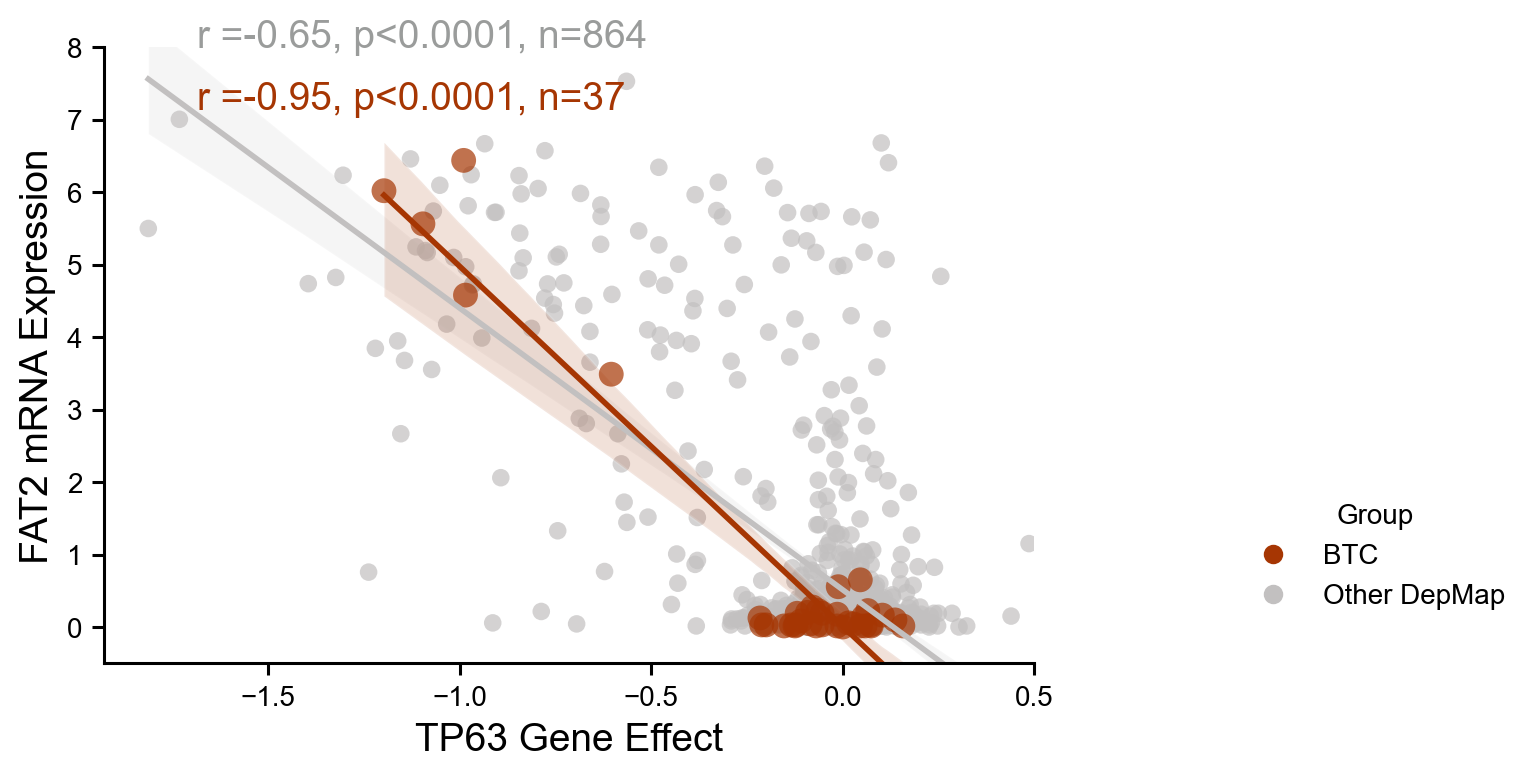

In [44]:
x_gene = 'TP63'
y_gene = 'FAT2'
palette = {'BTC': '#a63603', 'Other DepMap': '#c2c0c0'}
size_dic = {'BTC': 80, 'Other DepMap': 40}
markers_dic = {'BTC':'o', 'Other DepMap':'o'}

x1, y1 = Utils.match_rows_df(other_ccle_crispr_df[[x_gene]], other_ccle_rna_df[[y_gene]])
x2, y2  = Utils.match_rows_df(gene_effect_df[[x_gene]], rna_df[[y_gene]])

df1 = pd.concat([x1, y1], axis=1)
df1['Group'] = 'Other DepMap'
df1['point_size'] = .01
df2 = pd.concat([x2, y2], axis=1)
df2['Group'] = 'BTC'
df2['point_size'] = .03

df = pd.concat([df1, df2], axis=0)
MyVisualization.reg_plot_double(data_df=df, x_col=x_gene, y_col=y_gene, markers_dic=markers_dic, size_dic=size_dic, hue='Group', palette=palette, xlabel=f'{x_gene} Gene Effect',  ylabel=f'{y_gene} mRNA Expression',text_height=1,ylim_bottom=-.5, ylim_top=8, xlim_right=0.5, text_x_offset=.1,file_name=f'{x_gene}_{y_gene}')#  